# Homework Week 16
## Unsupervised Learning
## Kelompok 4 - pd.give_insight()

disusun oleh : Amarindra Ardinova, Kenneth Wahyudi, Anisa Millah Taqiyyah, Elkania Samantha, M. Haniff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
url = 'https://raw.githubusercontent.com/amarindraa/Week16_Unsupervised_Learning/main/flight.csv'
data = pd.read_csv(url)
df = data.copy()

# 1. EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.columns = df.columns.str.lower()  # agar memudahkan coding

In [ ]:
df.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.00,62988.00,62568.00,62988.00,62988.00,62437.00,62850.00,62988.00,62988.00,62988.00,62988.00,62988.00,62988.00,62988.00,62988.00
mean,31494.50,4.10,42.48,11.84,10925.08,5355.38,5604.03,17123.88,176.12,67.75,166.03,0.32,0.72,12545.78,2.73
std,18183.21,0.37,9.89,14.05,16339.49,8109.45,8703.36,20960.84,183.82,77.52,123.40,1.14,0.19,20507.82,7.36
min,1.00,4.00,6.00,2.00,0.00,0.00,0.00,368.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15747.75,4.00,35.00,3.00,2518.00,1003.00,780.00,4747.00,29.00,23.37,79.00,0.00,0.61,2775.00,0.00
50%,31494.50,4.00,41.00,7.00,5700.00,2800.00,2773.00,9994.00,108.00,44.67,143.00,0.00,0.71,6328.50,0.00
75%,47241.25,4.00,48.00,15.00,12831.00,6574.00,6845.75,21271.25,268.00,82.00,228.00,0.00,0.81,14302.50,1.00
max,62988.00,6.00,110.00,213.00,505308.00,239560.00,234188.00,580717.00,731.00,728.00,728.00,46.00,1.50,985572.00,140.00


In [ ]:
df.describe(include=object)

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### 1.a
### Data Cleaning
Data Cleaning, Duplicated, NaN

### Duplicated

In [ ]:
df.duplicated().sum()

0

### Missing Values

In [ ]:
df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)].shape[0]

4733

#### Fillna Median

dipilih median, untuk meminimalisir skewed

In [ ]:
df['sum_yr_1'].fillna(df['sum_yr_1'].median(), inplace=True)
df['sum_yr_2'].fillna(df['sum_yr_2'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                     0
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1                0
sum_yr_2                0
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [ ]:
df.dropna(subset=['gender'], inplace=True)

In [ ]:
df.dropna(subset=['work_country'], inplace=True)

In [ ]:
df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  0
ffp_tier                0
work_city            2244
work_province        3223
work_country            0
age                     0
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1                0
sum_yr_2                0
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [ ]:
df['work_city'].value_counts()

guangzhou                  9386
beijing                    7845
shanghai                   5001
shenzhen                   3605
dalian                     1979
                           ... 
fengxianhuanchengdonglu       1
KASUGAI                       1
hainan                        1
xinxishi                      1
lingshui                      1
Name: work_city, Length: 3232, dtype: int64

In [ ]:
df = df[df['work_city'] != '.']

In [ ]:
df['work_province'].value_counts()

guangdong        17507
beijing           7517
shanghai          4937
liaoning          4182
xinjiang          2510
                 ...  
taibeishi            1
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
JAWATIMUR            1
Name: work_province, Length: 1158, dtype: int64

In [ ]:
df['work_city'].fillna('guangzhou', inplace=True)
df['work_province'].fillna('guangdong', inplace=True)


<ipython-input-18-e082b8f499ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_city'].fillna('guangzhou', inplace=True)
<ipython-input-18-e082b8f499ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_province'].fillna('guangdong', inplace=True)


In [ ]:
df.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

##### Handling Missing Value Summary :
1) SUM_YR_1, SUM_YR_2 dan AGE diimputasi menggunakan mean
2) GENDER dan WORK_COUNTRY di drop karena hanya 3 dan 26
3) WORK_CITY dan WORK_PROVINCE diimputasi dengan menggunakan value Modus
4) WORK_CITY dengan label '.' di drop

### Merubah Objek Menjadi DateFormat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62292 entries, 1 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62292 non-null  int64  
 1   ffp_date           62292 non-null  object 
 2   first_flight_date  62292 non-null  object 
 3   gender             62292 non-null  object 
 4   ffp_tier           62292 non-null  int64  
 5   work_city          62292 non-null  object 
 6   work_province      62292 non-null  object 
 7   work_country       62292 non-null  object 
 8   age                62292 non-null  float64
 9   load_time          62292 non-null  object 
 10  flight_count       62292 non-null  int64  
 11  bp_sum             62292 non-null  int64  
 12  sum_yr_1           62292 non-null  float64
 13  sum_yr_2           62292 non-null  float64
 14  seg_km_sum         62292 non-null  int64  
 15  last_flight_date   62292 non-null  object 
 16  last_to_end        622

In [ ]:
data = df #backup df

In [ ]:
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
1,28065,2/19/2007,8/3/2007,Male,6,guangzhou,beijing,CN,42.00,3/31/2014,140,362480,171483.00,167434.00,293678,3/25/2014,7,5.19,17,29,1.25,415768,33
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.00,3/31/2014,23,337314,116350.00,125500.00,281336,12/26/2013,97,27.86,73,11,1.09,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.00,3/31/2014,152,273844,124560.00,130702.00,309928,3/27/2014,5,4.79,47,27,0.97,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.00,3/31/2014,92,313338,112364.00,76946.00,294585,1/13/2014,79,7.04,52,10,0.97,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.00,3/31/2014,101,248864,120500.00,114469.00,287042,3/31/2014,1,7.19,28,20,0.97,298873,29


#### Merubah Datatype Objek Menjadi Datetime

In [ ]:
date_format = '%m/%d/%Y'
df['ffp_date'] = pd.to_datetime(df['ffp_date'], format=date_format)
df['first_flight_date'] = pd.to_datetime(df['first_flight_date'], format=date_format)
df['load_time'] = pd.to_datetime(df['load_time'], format=date_format)


In [ ]:
df[df['last_flight_date'] == '2014/2/29  0:00:00'].head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.00,2014-03-31,53,116307,30884.00,70845.00,85000,2014/2/29 0:00:00,32,13.25,57,0,1.37,132653,4
447,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.00,2014-03-31,31,96739,26510.00,46323.00,69453,2014/2/29 0:00:00,32,22.77,75,6,1.38,101413,7
832,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.00,2014-03-31,80,61418,32900.00,36417.00,114222,2014/2/29 0:00:00,32,8.70,34,2,0.66,91476,15
1051,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.00,2014-03-31,27,65918,23892.00,35680.00,49859,2014/2/29 0:00:00,32,19.12,72,4,1.39,69047,4
1170,14966,2011-08-29,2011-08-29,Female,5,beijing,beijing,CN,42.00,2014-03-31,28,60080,35308.00,25973.00,58744,2014/2/29 0:00:00,32,25.19,108,3,1.13,100080,5


In [ ]:
df['last_flight_date'] = df['last_flight_date'].replace('2014/2/29  0:00:00', '2014-2-29')

#### Membuat Kolom Baru untuk LAST_FLIGHT_DATE

dikarenakan penanggalan yang berbeda-beda pada tiap baris, maka diperlukan syntax yang berbeda

In [ ]:
# Membuat kolom baru untuk tanggal yang diubah formatnya
df['last_flight_date_2'] = df['last_flight_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

# Menggunakan if else dan strftime untuk mengubah format tanggal
df['last_flight_date_2'] = df['last_flight_date_2'].apply(
    lambda x: x.strftime('%Y-%m-%d') if pd.notna(x) else '')

In [ ]:
df.isna().sum()

member_no             0
ffp_date              0
first_flight_date     0
gender                0
ffp_tier              0
work_city             0
work_province         0
work_country          0
age                   0
load_time             0
flight_count          0
bp_sum                0
sum_yr_1              0
sum_yr_2              0
seg_km_sum            0
last_flight_date      0
last_to_end           0
avg_interval          0
max_interval          0
exchange_count        0
avg_discount          0
points_sum            0
point_notflight       0
last_flight_date_2    0
dtype: int64

#### Merubah Kolom last_flight_date_2 Menjadi las_flight_date dengan Tipe Datetime

In [ ]:
date_format = '%Y/%m/%d'
df['last_flight_date_2'] = pd.to_datetime(df['last_flight_date_2'], format=date_format)

In [ ]:
median_date = df['last_flight_date_2'].median()
df['last_flight_date_2'].fillna(median_date, inplace=True)

In [ ]:
df.drop(columns=['last_flight_date'], inplace=True)
df.rename(columns={'last_flight_date_2':'last_flight_date'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62292 entries, 1 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62292 non-null  int64         
 1   ffp_date           62292 non-null  datetime64[ns]
 2   first_flight_date  62292 non-null  datetime64[ns]
 3   gender             62292 non-null  object        
 4   ffp_tier           62292 non-null  int64         
 5   work_city          62292 non-null  object        
 6   work_province      62292 non-null  object        
 7   work_country       62292 non-null  object        
 8   age                62292 non-null  float64       
 9   load_time          62292 non-null  datetime64[ns]
 10  flight_count       62292 non-null  int64         
 11  bp_sum             62292 non-null  int64         
 12  sum_yr_1           62292 non-null  float64       
 13  sum_yr_2           62292 non-null  float64       
 14  seg_km

##### Kolom ffp_date, first_flight_date & last_flight_date sudah dirubah menjadi datetime

## 1.b

### Statistik Numerik & Kategorikal

In [ ]:
df.describe(include=object)

,gender,work_city,work_province,work_country
count,62292,62292,62292,62292
unique,2,3231,1158,117
top,Male,guangzhou,guangdong,CN
freq,47575,11630,20730,57143


In [ ]:
df.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00
mean,31495.64,4.10,42.44,11.77,10800.67,5283.47,5530.48,17034.81,176.50,67.81,166.15,0.32,0.72,12402.24,2.73
std,18184.86,0.36,9.85,13.88,15913.19,7891.38,8491.69,20681.30,183.87,77.47,123.40,1.12,0.18,20016.44,7.37
min,2.00,4.00,6.00,2.00,0.00,0.00,0.00,368.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15755.75,4.00,35.00,3.00,2504.00,1020.00,777.00,4736.00,30.00,23.45,79.00,0.00,0.61,2762.00,0.00
50%,31485.50,4.00,41.00,7.00,5671.00,2800.00,2770.00,9967.00,108.00,44.75,143.00,0.00,0.71,6296.00,0.00
75%,47245.25,4.00,48.00,15.00,12747.25,6491.25,6784.00,21188.50,268.00,82.25,228.00,0.00,0.81,14196.75,1.00
max,62988.00,6.00,110.00,213.00,362480.00,188926.00,198224.00,375074.00,731.00,728.00,728.00,46.00,1.50,985572.00,140.00


In [ ]:
df.describe(datetime_is_numeric=True)


,member_no,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,last_flight_date
count,62292.00,62292,62292,62292.00,62292.00,62292,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292.00,62292
mean,31495.64,2010-03-06 15:30:55.133885696,2010-08-31 21:44:01.571951360,4.10,42.44,2014-03-31 00:00:00.000000256,11.77,10800.67,5283.47,5530.48,17034.81,176.50,67.81,166.15,0.32,0.72,12402.24,2.73,2013-10-06 17:22:06.680794112
min,2.00,2004-11-01 00:00:00,1905-12-31 00:00:00,4.00,6.00,2014-03-31 00:00:00,2.00,0.00,0.00,0.00,368.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2012-04-01 00:00:00
25%,15755.75,2008-04-13 00:00:00,2008-12-15 00:00:00,4.00,35.00,2014-03-31 00:00:00,3.00,2504.00,1020.00,777.00,4736.00,30.00,23.45,79.00,0.00,0.61,2762.00,0.00,2013-07-08 00:00:00
50%,31485.50,2010-10-05 00:00:00,2011-04-21 00:00:00,4.00,41.00,2014-03-31 00:00:00,7.00,5671.00,2800.00,2770.00,9967.00,108.00,44.75,143.00,0.00,0.71,6296.00,0.00,2013-12-14 00:00:00
75%,47245.25,2012-03-28 00:00:00,2012-07-26 00:00:00,4.00,48.00,2014-03-31 00:00:00,15.00,12747.25,6491.25,6784.00,21188.50,268.00,82.25,228.00,0.00,0.81,14196.75,1.00,2014-03-02 00:00:00
max,62988.00,2013-03-31 00:00:00,2015-05-30 00:00:00,6.00,110.00,2014-03-31 00:00:00,213.00,362480.00,188926.00,198224.00,375074.00,731.00,728.00,728.00,46.00,1.50,985572.00,140.00,2014-03-31 00:00:00
std,18184.86,NaN,NaN,0.36,9.85,NaN,13.88,15913.19,7891.38,8491.69,20681.30,183.87,77.47,123.40,1.12,0.18,20016.44,7.37,NaN


In [ ]:
# Assuming your DataFrame is named 'df'
# List of column names containing numerical data
nums = df.select_dtypes(include='number').columns.tolist()[1:]

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

# List of column names containing categorical/object data
dtime = df.select_dtypes(include='datetime').columns.tolist()

### Distribusi Kolom Numerik

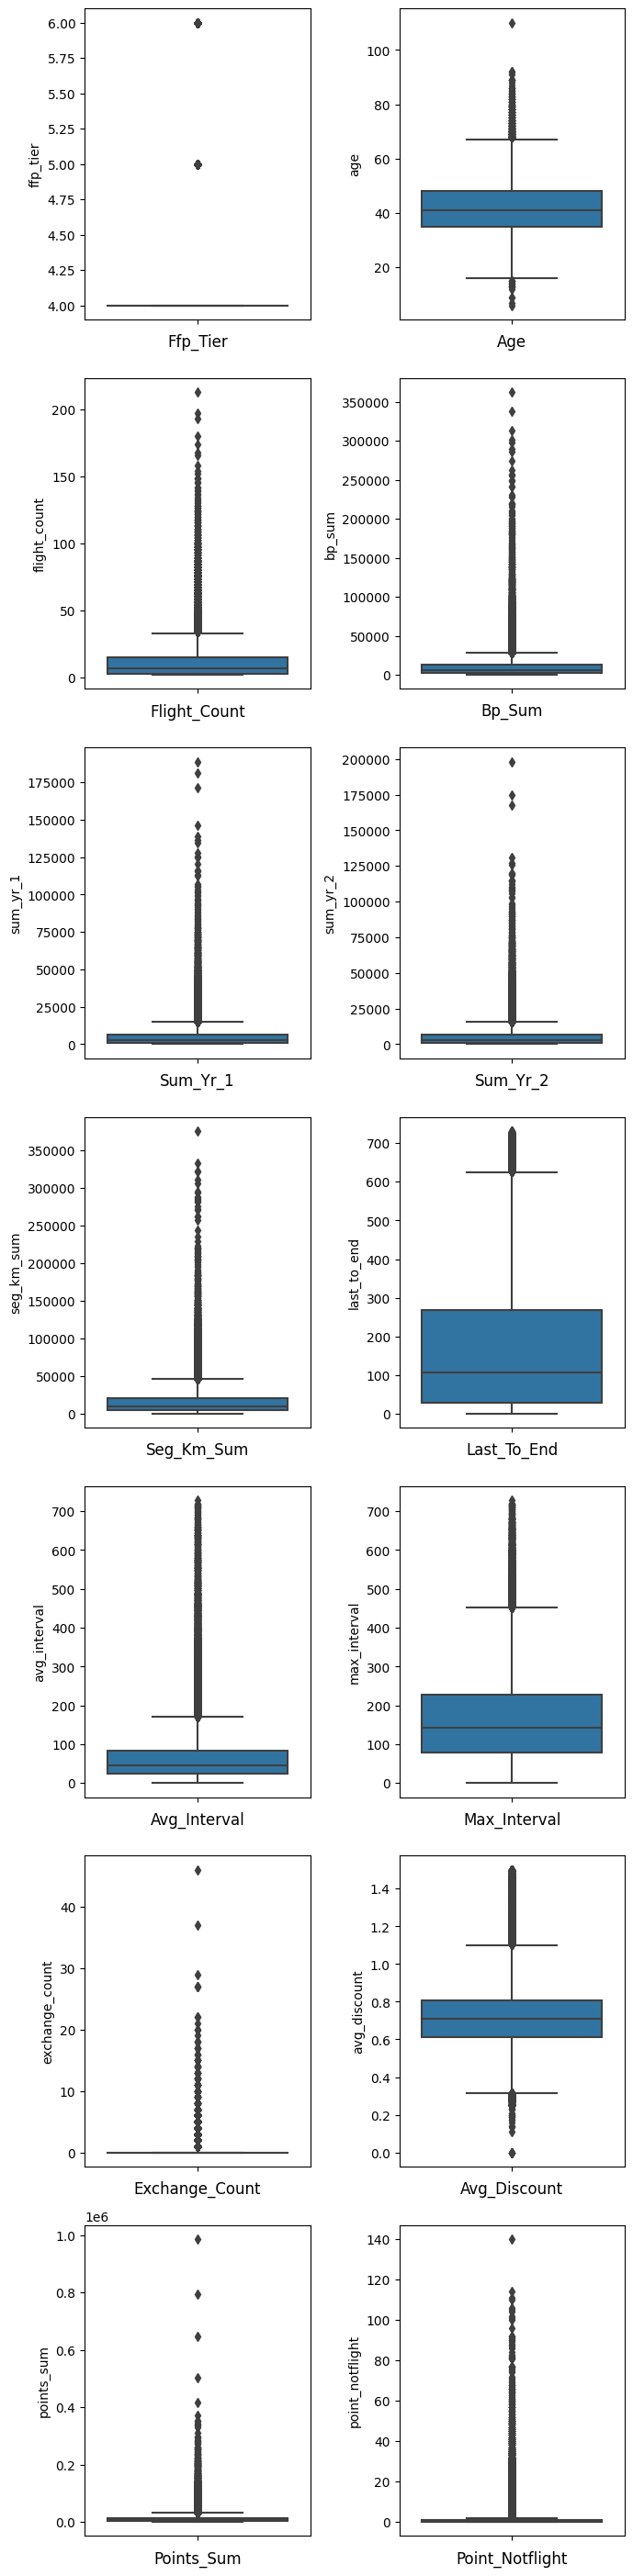

In [ ]:
b = 2 # divider

plt.figure(figsize=((len(nums)/b), (len(nums)*4)))

for i in range(len(nums)):
    plt.subplot(len(nums), b, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.xlabel(nums[i].title(), fontsize=12)
    plt.tight_layout()

plt.show()

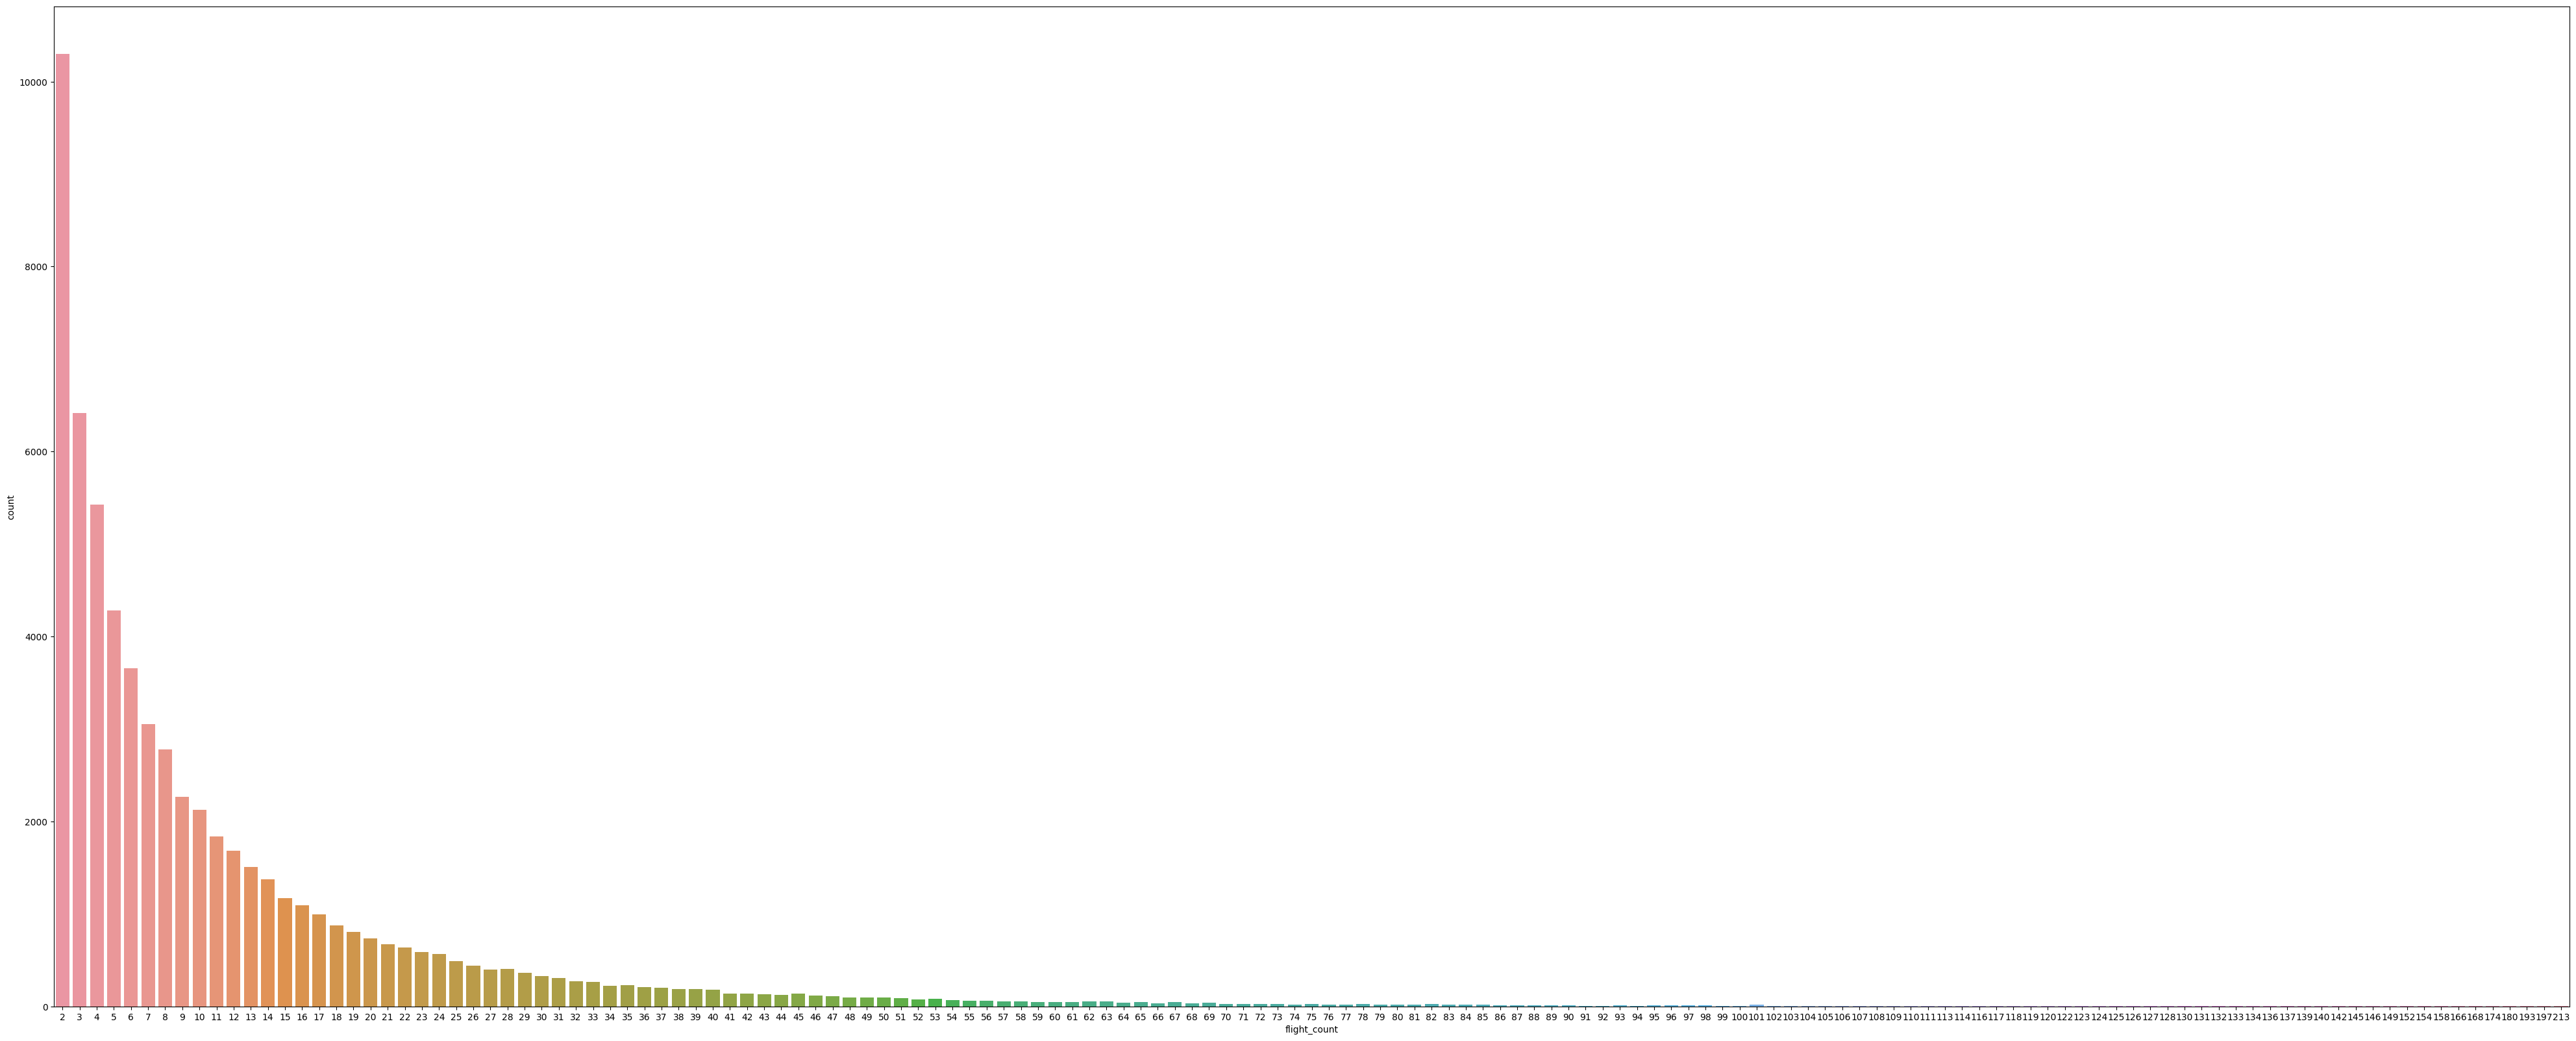

In [ ]:
plt.figure(figsize=(50,20))
ax = sns.countplot(x='flight_count', data=df)

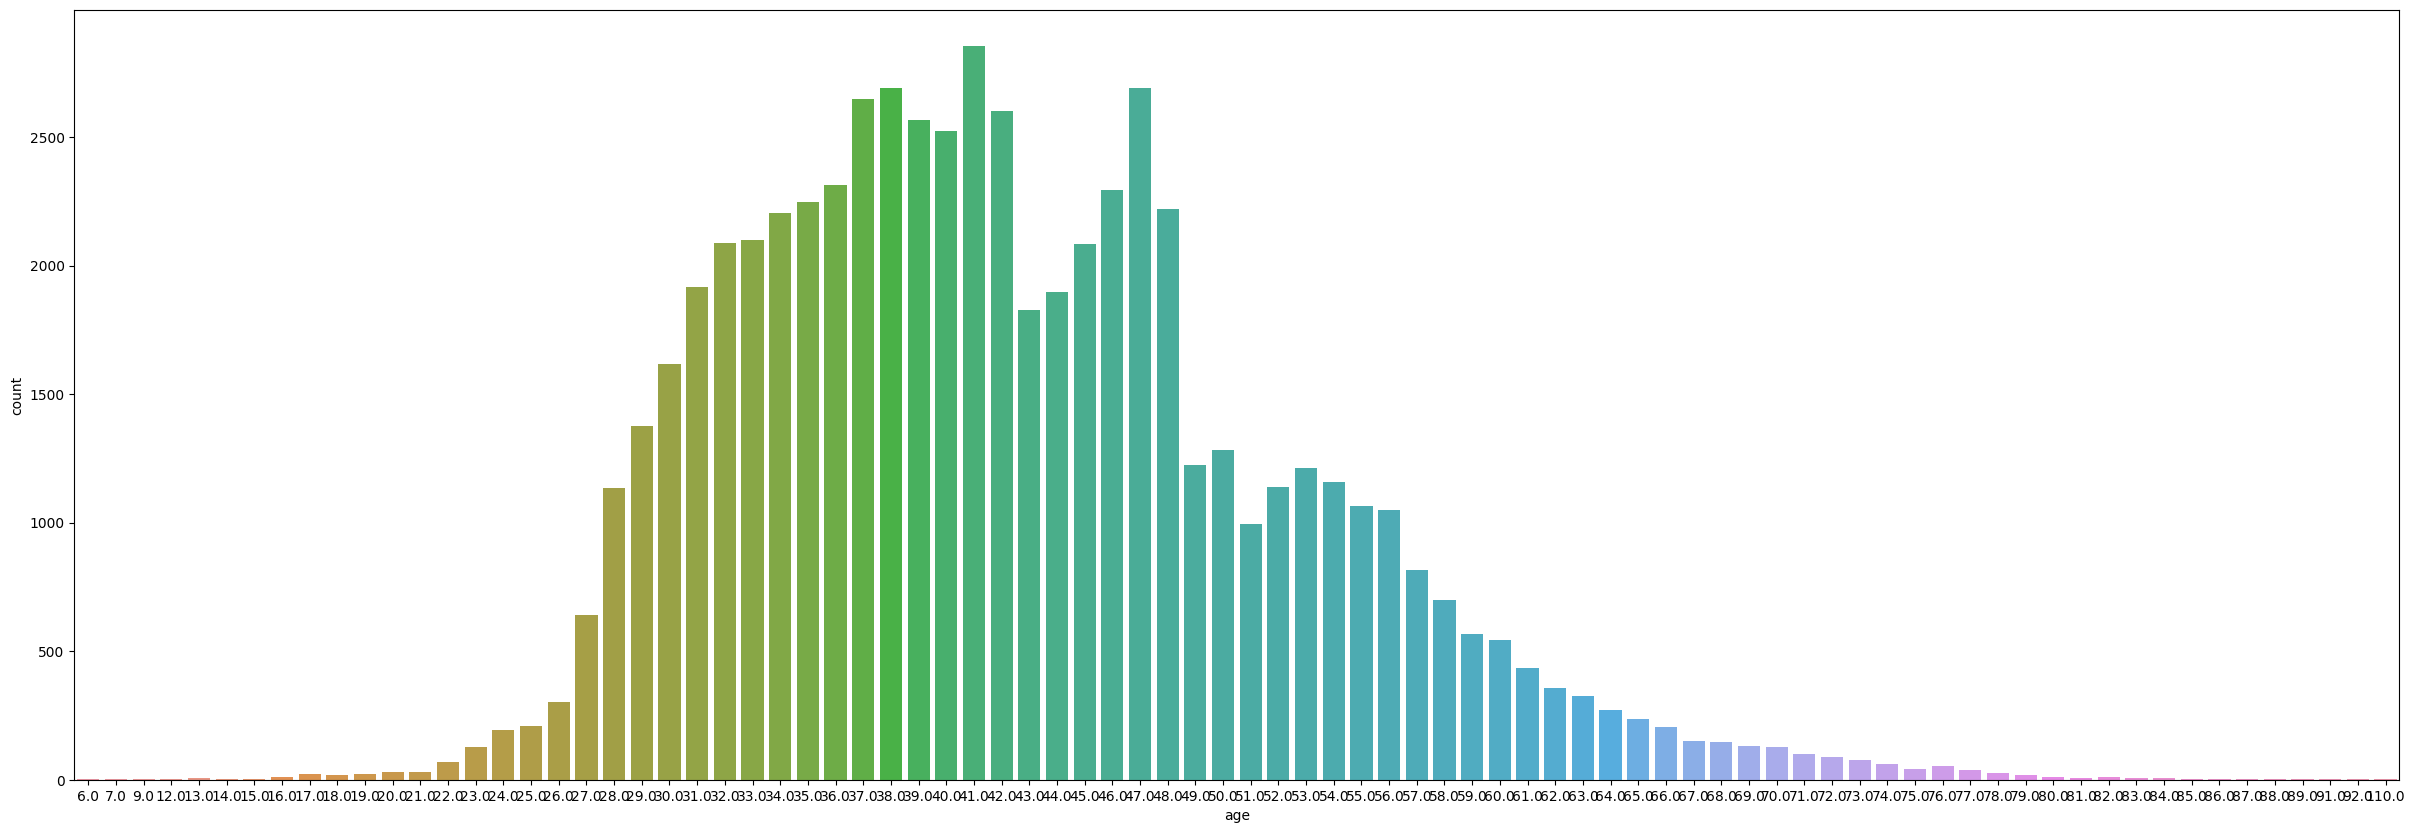

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='age', data=df)

In [ ]:
df['age'].describe()

count   62292.00
mean       42.44
std         9.85
min         6.00
25%        35.00
50%        41.00
75%        48.00
max       110.00
Name: age, dtype: float64

In [ ]:
df['age'].median()

41.0

Berdasarkan statistik, usia yang paling banyak melakukan penerbangan adalah rentang 35 - 48 tahun, dengan value yang paling banyak ada di usia 41 tahun.

### Data Unique Categorical

In [ ]:
hasil = []
for col in df.select_dtypes(include='object'):
    hasil.append([col, df[col].dtype, df[col].isna().sum(), (df[col].isna().sum()/len(df[col]))*100, df[col].nunique(), df[col].unique()[:4]])

output = pd.DataFrame(data=hasil, columns='kolom tipedata jumlah_null persen_null jumlah_unik contoh_unik'.split())
output

,kolom,tipedata,jumlah_null,persen_null,jumlah_unik,contoh_unik
0,gender,object,0,0.00,2,"[Male, Female]"
1,work_city,object,0,0.00,3231,"[guangzhou, Los Angeles, guiyang, wulumuqishi]"
2,work_province,object,0,0.00,1158,"[beijing, CA, guizhou, guangdong]"
3,work_country,object,0,0.00,117,"[CN, US, FR, AN]"


### Hubungan Antar Feature

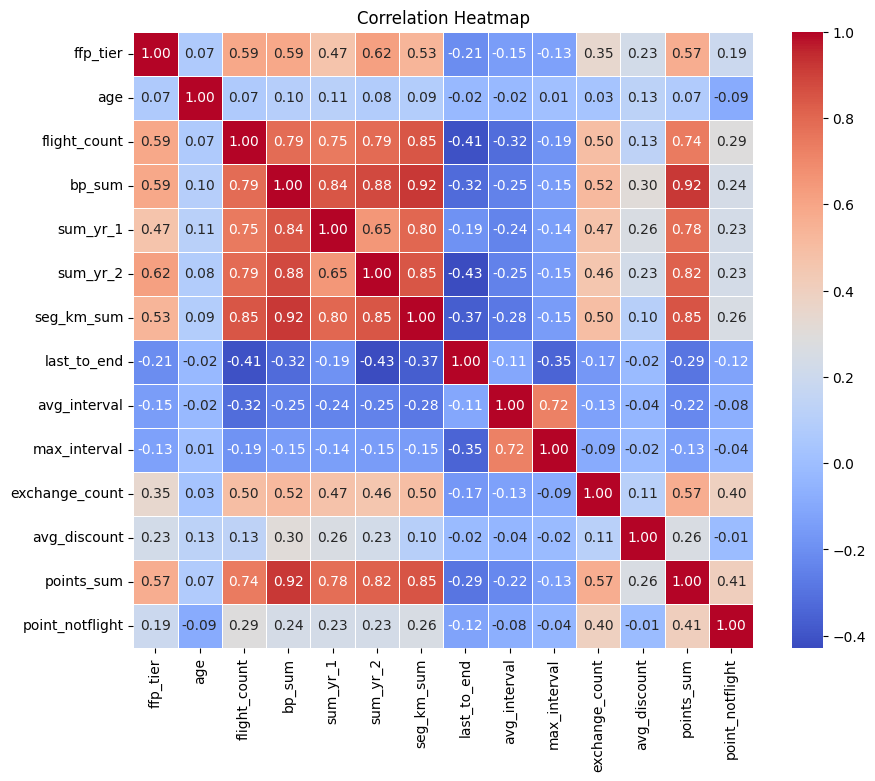

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = df.drop(['age','exchange_count','point_notflight','avg_interval','max_interval'], axis = 1)



Feature yang tidak memliki korelasi yang kuat dengan fitur yang lain di drop
'member_no','age','exchange_count','point_notflight','avg_interval','max_interval

In [ ]:
data1 = df.copy()

## Summary 1 EDA:
a) Semua tipe data tepat, sudah tidak ada Missing Value (data kosong), tidak ada duplicate, sesuai dengan range_value

b) distribusi dari setiap kolom cendrung positive skewed dengan outliers di kanan

c) BP_SUM berkorelasi dengan POINTS_SUM dan SEG_KM_SUM bersifat redundan.
BP_SUM berkorelasi dengan SUM_YR_1 dan SUM_YR_2 bersifat redundan


# 2. Feature

In [ ]:
data2 = df.copy()

https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444        
https://iopscience.iop.org/article/10.1088/1742-6596/1168/3/032086/pdf     
https://www.vde-verlag.de/proceedings-en/565739040.html :
The LRFMC model is constructed as the model of aviation customer value analysis, On this basis use k-means clustering algorithm to classify customers and conduct feature research for the purpose of value analysis. Classification results show that this scheme has certain reference value in solving the problem of customer value analysis and further developing the corresponding marketing strategy

## 2.a Pemilihan Feature dari yang sudah ada
Menentukan fitur dengan metode RFMCL metode

* Recency : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir -> `last_to_end`
* Frequency : Berapa kali seorang customer menggunakan airline -> `flight_count`
* Monetary Value : Jumlah total jarak travel dari customer -> `seg_km_sum`
* Coefficient Value : Koefisien dari rata-rata diskon yang didapatkan customer -> `avg_discount`
* Length Relation : Lamanya customer menjadi member di airline tersebut -> `membership_month`



Load_time, ffp_date, last_to_end, flight_count, seg_km_sum, avg_discount

In [ ]:
df = df[df['last_flight_date'] > df['first_flight_date']]

In [ ]:
data2 = df.copy()

## 2.b Feature Engineering (pengolahan feature baru)
Dibuat feature baru untuk melihat frekuensi terbang/tahun dari customer

In [ ]:
df = df[['member_no','load_time', 'ffp_date', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount','first_flight_date','last_flight_date']]


In [ ]:
df['ffp_duration_days'] = (df['load_time'] - df['ffp_date'])
df['ffp_duration_month'] = round((df['load_time'] - df['ffp_date'])/np.timedelta64(1,'M'),0)

<ipython-input-49-031ed16ed307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ffp_duration_days'] = (df['load_time'] - df['ffp_date'])
<ipython-input-49-031ed16ed307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ffp_duration_month'] = round((df['load_time'] - df['ffp_date'])/np.timedelta64(1,'M'),0)


In [ ]:
# Freq / years

df['membership_year'] = df['ffp_duration_month'] / 12

<ipython-input-50-06a18b9cf47c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['membership_year'] = df['ffp_duration_month'] / 12


In [ ]:
df['fly_yearly'] = df['flight_count'] / df['membership_year']

<ipython-input-51-c612a1a1bd90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fly_yearly'] = df['flight_count'] / df['membership_year']


In [ ]:
df.head()

,member_no,load_time,ffp_date,last_to_end,flight_count,seg_km_sum,avg_discount,first_flight_date,last_flight_date,ffp_duration_days,ffp_duration_month,membership_year,fly_yearly
1,28065,2014-03-31,2007-02-19,7,140,293678,1.25,2007-08-03,2014-03-25,2597 days,85.00,7.08,19.76
3,21189,2014-03-31,2008-08-22,97,23,281336,1.09,2008-08-23,2013-12-26,2047 days,67.00,5.58,4.12
4,39546,2014-03-31,2009-04-10,5,152,309928,0.97,2009-04-15,2014-03-27,1816 days,60.00,5.00,30.40
5,56972,2014-03-31,2008-02-10,79,92,294585,0.97,2009-09-29,2014-01-13,2241 days,74.00,6.17,14.92
6,44924,2014-03-31,2006-03-22,1,101,287042,0.97,2006-03-29,2014-03-31,2931 days,96.00,8.00,12.62


In [ ]:
df['fly_yearly'].describe()

count   62000.00
mean        3.66
std         4.55
min         0.21
25%         1.04
50%         2.12
75%         4.50
max        90.35
Name: fly_yearly, dtype: float64

In [ ]:
df[(df['fly_yearly'] == 2)].describe()

,member_no,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_duration_days,ffp_duration_month,membership_year,fly_yearly
count,761.00,761.00,761.00,761.00,761.00,761,761.00,761.00,761.00
mean,30967.82,226.71,5.14,8639.77,0.70,939 days 12:59:36.346911952,30.82,2.57,2.00
std,17875.76,173.88,3.67,9674.55,0.19,668 days 22:48:32.888123536,22.03,1.84,0.00
min,164.00,1.00,2.00,736.00,0.25,365 days 00:00:00,12.00,1.00,2.00
25%,16139.00,75.00,3.00,3530.00,0.58,533 days 00:00:00,18.00,1.50,2.00
50%,30822.00,187.00,4.00,5822.00,0.70,724 days 00:00:00,24.00,2.00,2.00
75%,45266.00,357.00,6.00,10213.00,0.80,1103 days 00:00:00,36.00,3.00,2.00
max,62732.00,712.00,18.00,134552.00,1.50,3291 days 00:00:00,108.00,9.00,2.00


## Summary :
1) berdasarkan nilai quantile-nya, rata-rata customer terbang sebanyak 1 - 4 kali / pertahun.

# 3. Clustering K-Means

In [ ]:
data3 = df.copy()

In [ ]:
df.select_dtypes(include='number').columns.tolist()

['member_no',
 'last_to_end',
 'flight_count',
 'seg_km_sum',
 'avg_discount',
 'ffp_duration_days',
 'ffp_duration_month',
 'membership_year',
 'fly_yearly']

In [ ]:
cats = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(include='number').columns.tolist()
dtime = df.select_dtypes(include='datetime').columns.tolist()

Menggunakan 'fly_yearly' sebagai target

In [ ]:
feats = df.select_dtypes(include='number').columns.tolist()[:-1]

## PreProcessing

## Outliers Treatment

In [ ]:
len(nums)

9

In [ ]:
nums

['member_no',
 'last_to_end',
 'flight_count',
 'seg_km_sum',
 'avg_discount',
 'ffp_duration_days',
 'ffp_duration_month',
 'membership_year',
 'fly_yearly']

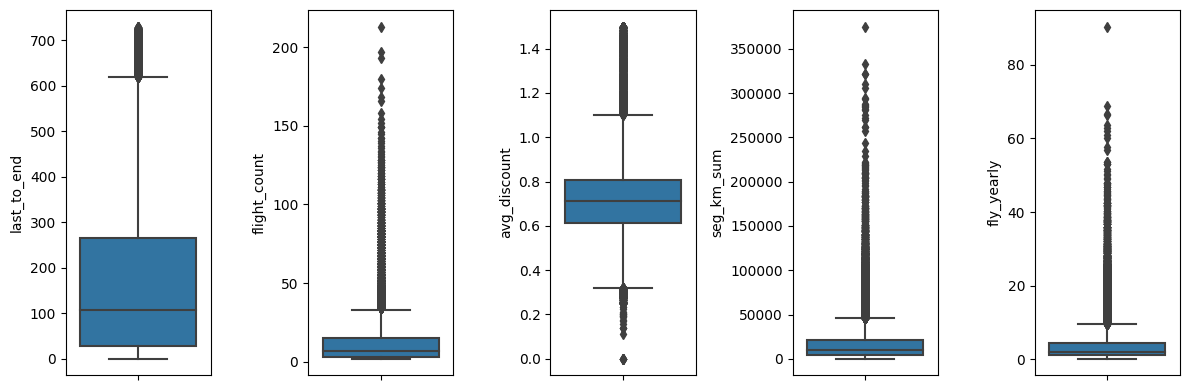

In [ ]:
nums =['last_to_end','flight_count','avg_discount','seg_km_sum','fly_yearly']

plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()


### Handling Outliers 1

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['avg_discount']))
filt_ent = (z_scores < 3)
df = df[filt_ent]

In [ ]:
df['last_to_end'] = np.log(df['last_to_end'])
df['flight_count'] = np.log(df['flight_count'])
df['seg_km_sum'] = np.log(df['seg_km_sum'])
df['fly_yearly'] = np.log(df['fly_yearly'])

<ipython-input-63-361e6e0cac15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_to_end'] = np.log(df['last_to_end'])
<ipython-input-63-361e6e0cac15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flight_count'] = np.log(df['flight_count'])
<ipython-input-63-361e6e0cac15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

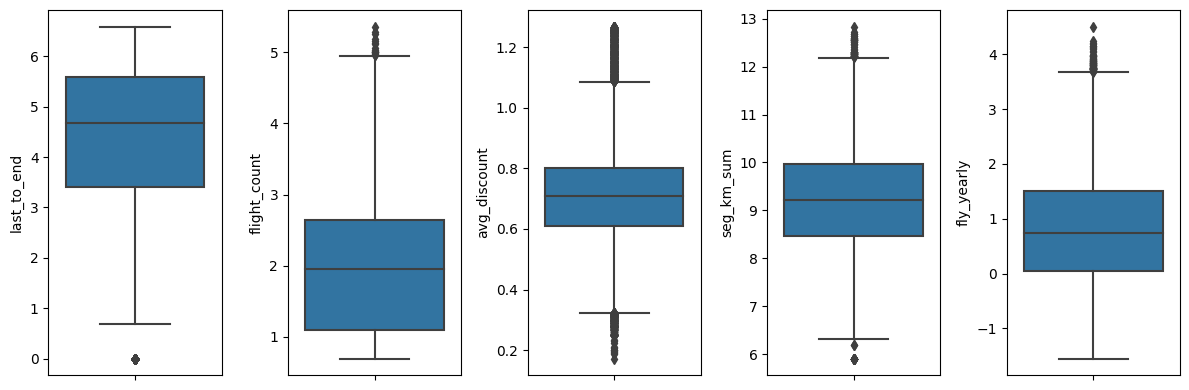

In [ ]:
nums =['last_to_end','flight_count','avg_discount','seg_km_sum','fly_yearly']

plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()


In [ ]:
# pembuangan outlier

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['last_to_end','flight_count','avg_discount','seg_km_sum','fly_yearly']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 60767
Jumlah baris setelah memfilter outlier: 58403


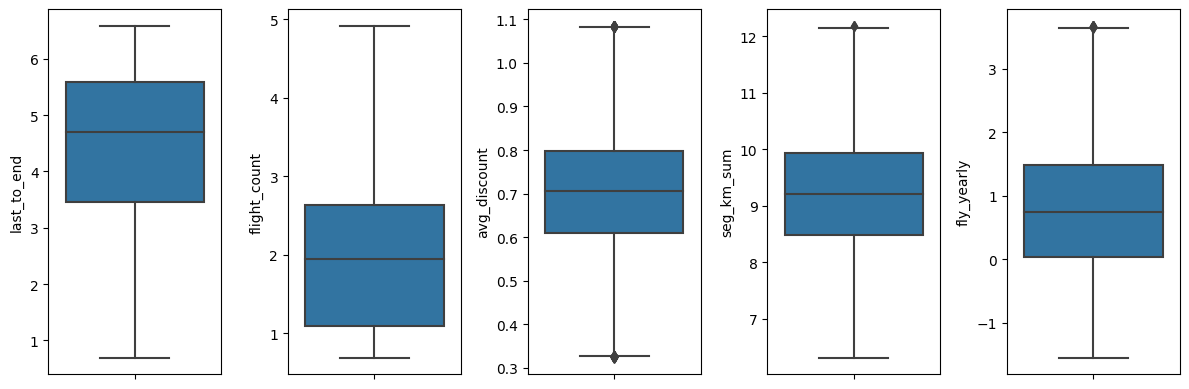

In [ ]:
nums =['last_to_end','flight_count','avg_discount','seg_km_sum','fly_yearly']

plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()


In [ ]:
df.head()

,member_no,load_time,ffp_date,last_to_end,flight_count,seg_km_sum,avg_discount,first_flight_date,last_flight_date,ffp_duration_days,ffp_duration_month,membership_year,fly_yearly
45,58693,2014-03-31,2010-12-11,3.09,3.04,12.13,1.03,2011-08-06,2014-03-10,1206 days,40.00,3.33,1.84
62,16812,2014-03-31,2010-06-09,1.79,4.43,12.14,0.94,2010-06-27,2014-03-26,1391 days,46.00,3.83,3.09
64,49208,2014-03-31,2010-05-28,2.08,3.40,12.01,1.06,2010-10-16,2014-03-24,1403 days,46.00,3.83,2.06
66,38456,2014-03-31,2007-11-15,4.48,3.47,12.11,0.94,2007-11-16,2014-01-04,2328 days,76.00,6.33,1.62
67,44377,2014-03-31,2010-07-10,2.94,3.53,12.04,1.01,2010-07-13,2014-03-13,1360 days,45.00,3.75,2.20


In [ ]:
df.describe()

,member_no,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_duration_days,ffp_duration_month,membership_year,fly_yearly
count,58403.00,58403.00,58403.00,58403.00,58403.00,58403,58403.00,58403.00,58403.00
mean,31500.01,4.44,1.98,9.22,0.70,1479 days 18:20:11.239148672,48.62,4.05,0.76
std,18187.73,1.45,0.93,1.00,0.14,842 days 00:37:15.646613248,27.67,2.31,1.02
min,2.00,0.69,0.69,6.31,0.32,365 days 00:00:00,12.00,1.00,-1.55
25%,15742.00,3.47,1.10,8.47,0.61,734 days 00:00:00,24.00,2.00,0.04
50%,31498.00,4.71,1.95,9.20,0.71,1266 days 00:00:00,42.00,3.50,0.74
75%,47294.50,5.59,2.64,9.94,0.80,2169 days 00:00:00,71.00,5.92,1.48
max,62988.00,6.59,4.92,12.18,1.09,3437 days 00:00:00,113.00,9.42,3.68


In [ ]:
df.shape[0]

58403

In [ ]:
df_preprocessing = df.copy()

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
feats = ['seg_km_sum','last_to_end','avg_discount','fly_yearly','flight_count']
X = df[feats].values
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data=X_std, columns=feats)

In [ ]:
new_df.describe()

,seg_km_sum,last_to_end,avg_discount,fly_yearly,flight_count
count,58403.00,58403.00,58403.00,58403.00,58403.00
mean,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.91,-2.59,-2.66,-2.27,-1.38
25%,-0.75,-0.67,-0.65,-0.70,-0.95
50%,-0.02,0.19,0.02,-0.02,-0.03
75%,0.72,0.80,0.67,0.71,0.71
max,2.97,1.49,2.68,2.88,3.17


Standarisasi sukses karena :

1) Mean mendekati 0
2) std deviasi mendekati 1

In [ ]:
new_df.head()

,seg_km_sum,last_to_end,avg_discount,fly_yearly,flight_count
0,2.92,-0.93,2.29,1.07,1.15
1,2.93,-1.83,1.65,2.29,2.64
2,2.79,-1.63,2.48,1.28,1.53
3,2.90,0.03,1.69,0.85,1.60
4,2.83,-1.03,2.17,1.42,1.67


## Algoritma K-Means

menggunakan prinsip centroid, yang meminimalisir total jarak setiap titik ke pusatnya

## 3.a. Elbow Methods

In [ ]:
from sklearn.cluster import KMeans

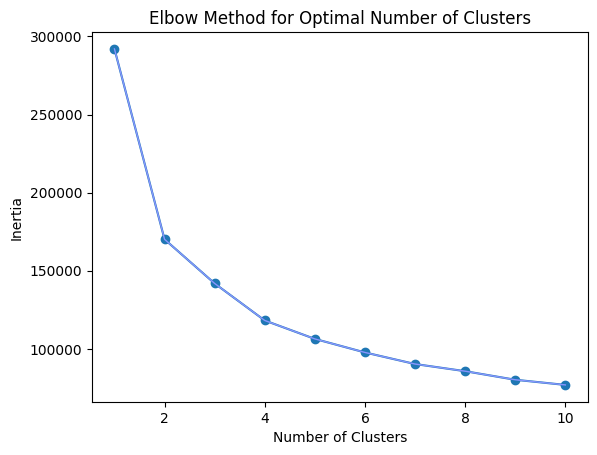

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

sns.lineplot(x=range(1, 11), y=inertia, color='#8895ff', linewidth = 1)
sns.scatterplot(x=range(1, 11), y=inertia, s=10, color='#081d8d')

plt.show()


In [ ]:
inertia

[292015.00000000093,
 170135.17567670697,
 141877.4962832247,
 118175.11342192054,
 106376.09612504553,
 97709.28622160437,
 90298.91165947258,
 85713.54181567681,
 80228.33320597607,
 76928.36019562784]

In [ ]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1))

0   121879.82
1    28257.68
2    23702.38
3    11799.02
4     8666.81
5     7410.37
6     4585.37
7     5485.21
8     3299.97
9         NaN
dtype: float64

### Summary:
berdasarkan Elbow Method dan Inertia value, diputuskan n_cluster=4

## 3.b. Clustering dengan K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=4, n_init=10, random_state=0)

note :


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_cluster=4, n_init = 10, n_jobs=none, precompute_distance='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
new_df['cluster'] = kmeans.labels_
new_df.head()

,seg_km_sum,last_to_end,avg_discount,fly_yearly,flight_count,cluster
0,2.92,-0.93,2.29,1.07,1.15,0
1,2.93,-1.83,1.65,2.29,2.64,0
2,2.79,-1.63,2.48,1.28,1.53,0
3,2.90,0.03,1.69,0.85,1.60,0
4,2.83,-1.03,2.17,1.42,1.67,0


In [ ]:
cluster_stats = display(new_df.groupby('cluster').agg(['mean','median']))

seg_km_sum        last_to_end        avg_discount        fly_yearly  \
              mean median        mean median         mean median       mean   
cluster                                                                       
0             1.25   1.23       -1.14  -1.15         0.18   0.16       1.17   
1            -0.74  -0.72        0.49   0.66        -1.14  -1.07      -0.75   
2             0.29   0.28       -0.02   0.12         0.02   0.02       0.29   
3            -0.95  -0.93        0.67   0.83         0.89   0.80      -0.86   

               flight_count         
        median         mean median  
cluster                             
0         1.16         1.36   1.34  
1        -0.74        -0.86  -0.95  
2         0.29         0.28   0.24  
3        -0.84        -0.92  -0.95

## 3.c. Evaluasi & Visualisasi dengan PCA

Digunakan PCA untuk visualisasi karena dengan pairplot tidak terlihat sebaran segmentasi yang jelas.
Karena tidak berguna dan hanya memberatkan beban kerja komputer, maka digunakan analisa visual dengan pca.

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(new_df)
pdf = pca.transform(new_df)

In [ ]:
pca_viz = pd.DataFrame(data = pdf, columns = ['PC 1', 'PC 2'])
pca_viz['cluster'] = new_df['cluster']
pca_viz.head()

,PC 1,PC 2,cluster
0,3.41,-1.94,0
1,5.06,-1.85,0
2,3.90,-2.19,0
3,3.19,-1.49,0
4,3.83,-1.98,0


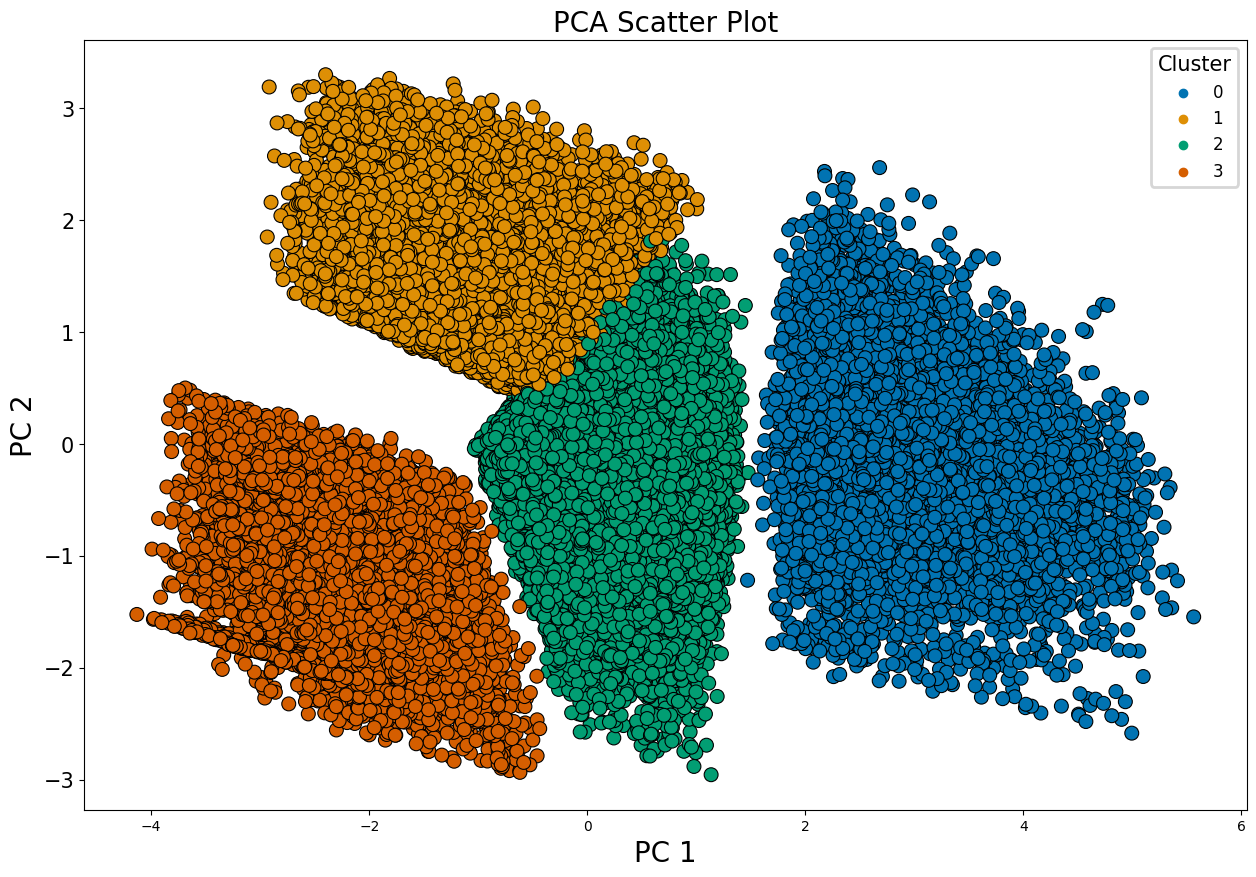

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    data=pca_viz,
    palette='colorblind',
    s=100,
    ax=ax,
)

plt.title('PCA Scatter Plot', fontsize=20)


legend = plt.legend(title='Cluster', fontsize=12, borderaxespad=0.5)
legend.get_title().set_fontsize(15)  # Set legend title fontsize
legend.get_frame().set_linewidth(2)  # Set legend boundary linewidth


plt.yticks(fontsize=15)
plt.ylabel('PC 2',fontsize=20)
plt.xlabel('PC 1',fontsize=20)
plt.show()

In [ ]:
data3 = df.copy()

# 4. Interpretasi Cluster

In [ ]:
data4 = df.copy()
data4_k = new_df.copy()

## a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster


In [ ]:
# manggil data awal
df_ori = data.copy()
df_fly = data3.copy()
df_pre = df_preprocessing.copy()

In [ ]:
df_fly.head()

,member_no,load_time,ffp_date,last_to_end,flight_count,seg_km_sum,avg_discount,first_flight_date,last_flight_date,ffp_duration_days,ffp_duration_month,membership_year,fly_yearly
45,58693,2014-03-31,2010-12-11,3.09,3.04,12.13,1.03,2011-08-06,2014-03-10,1206 days,40.00,3.33,1.84
62,16812,2014-03-31,2010-06-09,1.79,4.43,12.14,0.94,2010-06-27,2014-03-26,1391 days,46.00,3.83,3.09
64,49208,2014-03-31,2010-05-28,2.08,3.40,12.01,1.06,2010-10-16,2014-03-24,1403 days,46.00,3.83,2.06
66,38456,2014-03-31,2007-11-15,4.48,3.47,12.11,0.94,2007-11-16,2014-01-04,2328 days,76.00,6.33,1.62
67,44377,2014-03-31,2010-07-10,2.94,3.53,12.04,1.01,2010-07-13,2014-03-13,1360 days,45.00,3.75,2.20


In [ ]:
df_pre['cluster']=kmeans.labels_

In [ ]:
df_merged = df_ori.merge(df_fly[['member_no','membership_year','fly_yearly']], on='member_no', how='right')
df_merged = df_merged.merge(df_pre[['member_no', 'cluster']], on='member_no', how='right')
df_merged = df_merged[['age','flight_count','bp_sum','seg_km_sum','last_to_end','avg_discount','membership_year','fly_yearly','cluster']]

In [ ]:
df_merged.head()

,age,flight_count,bp_sum,seg_km_sum,last_to_end,avg_discount,membership_year,fly_yearly,cluster
0,39.00,21,219390,185493,22,1.03,3.33,1.84,0
1,52.00,84,182039,186821,6,0.94,3.83,3.09,0
2,44.00,30,188887,164001,8,1.06,3.83,2.06,0
3,39.00,32,188209,182563,88,0.94,6.33,1.62,0
4,53.00,34,183443,170121,19,1.01,3.75,2.20,0


In [ ]:
cols = df_merged.columns.tolist()

In [ ]:
display(df_merged[cols].groupby('cluster').agg(['mean','median','min','max']))

age                     flight_count                   bp_sum  \
         mean median   min    max         mean median min  max     mean   
cluster                                                                   
0       42.99  42.00 13.00  89.00        29.18  25.00   5  137 25805.20   
1       41.43  40.00  6.00  92.00         3.56   3.00   2   12  2101.30   
2       42.21  41.00 15.00 110.00        10.21   9.00   2   38  8949.20   
3       42.31  41.00  7.00  92.00         3.37   3.00   2   15  3609.33   

                              seg_km_sum                        last_to_end  \
          median  min     max       mean   median   min     max        mean   
cluster                                                                       
0       20676.00  413  219390   40916.58 34272.00  3757  195712       30.48   
1        1788.00    0   21607    5681.29  4895.00   716   49671      263.69   
2        7543.00  765  140743   15395.77 13395.50  1840  122320      130.90   
3        2859.00    0   75605    4750.04  3966.00   552   61160      311.90   

                        avg_discount                  membership_year         \
        median min  max         mean median  min  max            mean median   
cluster                                                                        
0        16.00   2  484         0.73   0.73 0.34 1.09            4.31   3.83   
1       220.00   2  730         0.54   0.55 0.32 0.71            3.94   3.33   
2       100.00   2  694         0.71   0.71 0.33 1.08            3.93   3.33   
3       281.00   2  730         0.83   0.82 0.65 1.08            4.11   3.67   

                  fly_yearly                    
         min  max       mean median   min  max  
cluster                                         
0       1.00 9.42       1.95   1.94 -0.20 3.68  
1       1.00 9.42      -0.01   0.00 -1.55 2.00  
2       1.00 9.42       1.05   1.05 -1.13 2.84  
3       1.00 9.42      -0.12  -0.09 -1.54 1.79

In [ ]:
df.isna().sum()

member_no             0
load_time             0
ffp_date              0
last_to_end           0
flight_count          0
seg_km_sum            0
avg_discount          0
first_flight_date     0
last_flight_date      0
ffp_duration_days     0
ffp_duration_month    0
membership_year       0
fly_yearly            0
dtype: int64

## b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster

**cluster 0:**
1. didominasi frequent flyer, terlihat dari seg_km_sum(total jarak penerbangan yang sudah dilakukan) dan angka fly_yearly.
2. business traveller, bp_sum yang tinggi menandakan membuat perencanaan
3. jika dilihat dari rentang usia kemungkinan besar terdapat business owner, director, manager yang traveling bersama anaknya.

**cluster 1:**
1. dengan rentang umur 15 - 110, kemungkngkinan besar ini adalah Family Traveler. Beberapa keluarga suka berlibur bersama orang tua dan anak-anaknya pada musim libur.
2. mereka akan terbang walau dengan diskon yang terendah dibandingkan dengan cluster yang lain, ini artinya moment lebih penting daripada diskon.
3. biasanya memang pada musim liburan tiket pesawat relatif lebih mahal.

**cluster 2:**
1. rentang umur remaja - 110 tahun, kemungkinan besar ini adalah tipe orang yang adveturer atau travel enthusiast yang bisa individu maupun via travel agent.
2. mereka membuat perencanaan perjalanan
3. miles mereka cukup tinggi (seg_km_sum)
4. cukup sering bepergian (flight_count & last_to_end)
5. membuat perencanaan perjalanan yang sangat matang(bp_sum, max)

cluster 3:
1. kategori terakhir adalah occasional traveler, bisa dilihat dari nilai-nilai kolom seperti last_to_end yang menunjukan rata-rata jarak memesan tiket adalah 311 hari.
2. cluster ini sensitif terhadap diskon.


## c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi bisnis

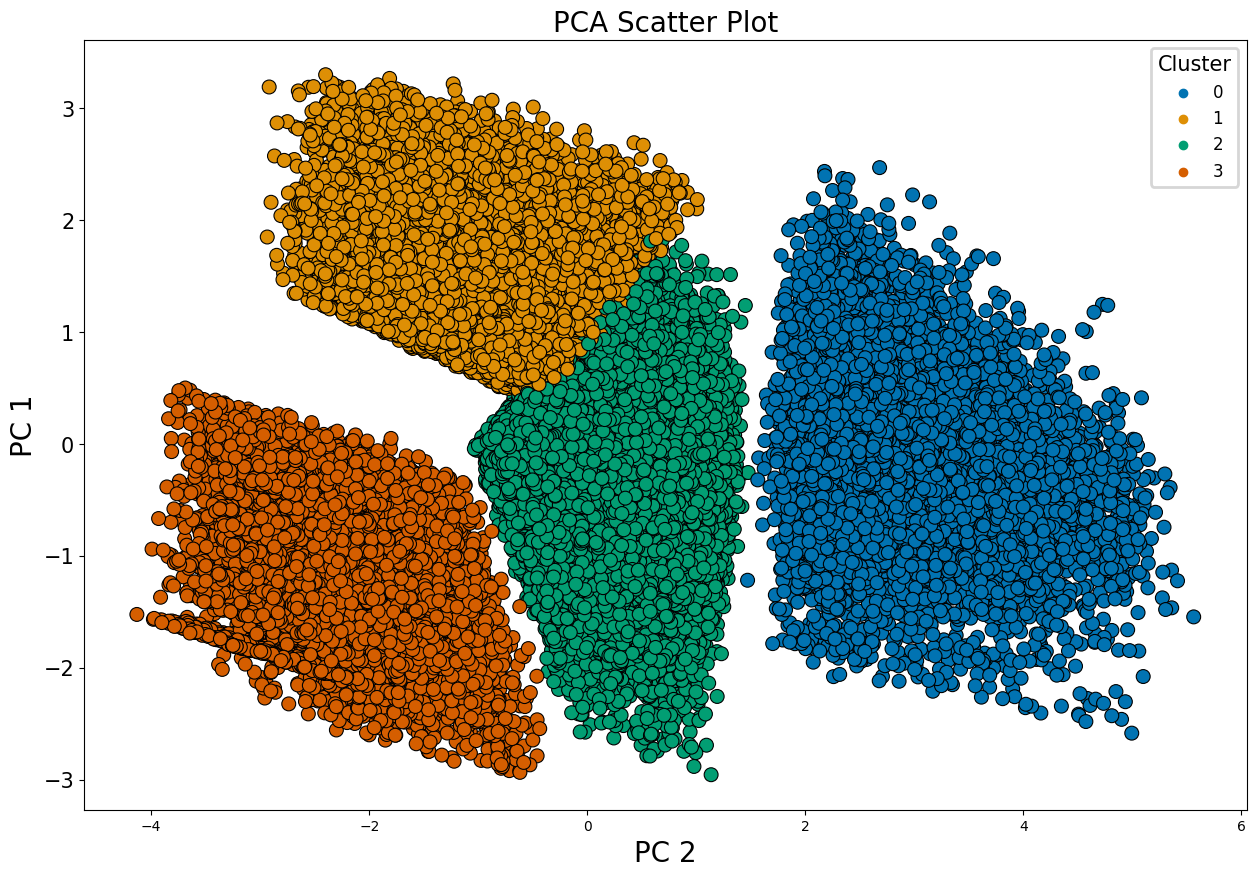

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    data=pca_viz,
    palette='colorblind',
    s=100,
    ax=ax,
)

plt.title('PCA Scatter Plot', fontsize=20)

legend = plt.legend(title='Cluster', fontsize=12, borderaxespad=0.5)
legend.get_title().set_fontsize(15)  # Set legend title fontsize
legend.get_frame().set_linewidth(2)  # Set legend boundary linewidth


plt.yticks(fontsize=15)
plt.ylabel('PC 1',fontsize=20)
plt.xlabel('PC 2',fontsize=20)
plt.show()

**Cluster 0 - Frequent Flyers & Business Travelers:**

1. Layanan Keanggotaan VIP: Tawarkan layanan keanggotaan khusus untuk frequent
flyers yang memberikan keuntungan seperti akses prioritas, diskon tambahan, dan akses ke lounge bandara.
2. Paket Perjalanan Bisnis: Sed1iakan paket perjalanan khusus untuk pelaku bisnis dengan fasilitas seperti pemesanan tiket, akomodasi, dan layanan transportasi yang terintegrasi.
3. Perjalanan Keluarga dengan Fasilitas Tambahan: Untuk pelaku bisnis yang sering bepergian dengan keluarga, tawarkan paket perjalanan khusus yang mencakup fasilitas untuk anak-anak, seperti permainan di pesawat atau hiburan di bandara.



**Cluster 1 - Family Travelers:**

1. Paket Liburan Keluarga All-Inclusive: Tawarkan paket liburan yang mencakup semua aspek perjalanan, mulai dari tiket pesawat, akomodasi, hingga kegiatan keluarga selama liburan.
2. Program Diskon Keluarga: Buat program diskon khusus untuk keluarga yang melakukan perjalanan bersama, seperti diskon untuk anak-anak atau fasilitas khusus untuk keluarga besar.
3. Liburan Tematik Keluarga: Sediakan opsi liburan tematik yang cocok untuk berbagai usia, seperti liburan petualangan alam atau liburan budaya yang sesuai untuk seluruh keluarga.



**Cluster 2 - Travel Enthusiasts & Adventurers:**

1. Paket Petualangan Khusus: Tawarkan paket perjalanan petualangan yang mengeksplor destinasi eksotis, olahraga ekstrem, atau kegiatan khusus lainnya yang menarik bagi para petualang.
2. Panduan Wisata Lokal: Sediakan panduan wisata lokal yang mendalam dan unik untuk membantu para petualang menjelajahi sisi tersembunyi suatu tempat.
Paket Perjalanan Khusus Minat: Buat paket perjalanan berdasarkan minat khusus, seperti fotografi, kuliner, atau budaya lokal yang mengundang para petualang.



**Cluster 3 - Occasional Travelers:**

1. Program Diskon Tertarget: Buat program diskon yang ditargetkan untuk menarik perhatian para pelancong gelegenheits yang sensitif terhadap harga.
Paket Perjalanan Akhir Pekan: Sediakan paket perjalanan singkat yang cocok untuk liburan akhir pekan atau cuti pendek dengan harga terjangkau.
2. Layanan Pengingat Perjalanan: Tawarkan layanan pengingat perjalanan melalui pesan teks atau email untuk membantu para pelancong yang sering melupakan perencanaan perjalanan.